# Introduction

According the [S&P/Experian Consumer Credit Default Index](https://us.spindices.com/index-family/specialty/consumer-credit-default), consumer credit default indices show higher default rates for all loan types in December 2018. Residents of big cities, including Chicago, New York, Los Angeles, Dallas or Miami, have the highest default rate. For banks and other financial institute, it is important to be able to predict which customers is more likely to default on their debts. So they can avoid paying the debts for their customers in the end. Predicting credit card default is a very important topic for financial institutes, as it is similar to the problem of financial fraud detection.


Financial fraud detection is a very important topic. In [Oxford English Dictionary](p.562), it defined fraud as "wrongful or criminal deception intended to result in financial or personal gain." In Economics, financial fraud is an increasingly serious problem. Enron, Cendant, and WorldCom are examples of large companies torn apart by financial fraud and scandal. The most common financial fraud includes bank fraud, insurance fraud, securities, and commodities fraud, and corporate fraud, etc. The related research paper shows that data mining techniques have been applied most extensively to the detection of insurance fraud, then corporate fraud and credit card fraud. 

Ngai et al. (2011) summaries the data mining techniques in financial fraud detection and reports six main classes of methods: classification, regression, clustering, prediction, outlier detection, and visualization. The primary data mining techniques used for financial fraud detection are logistic regression, neural networks, Naive Bayes, decision trees. In this project, I would like to use most of the methods mentioned above to predict on the credit card default rate on the dataset.


# Dataset
This data data set is about [default of credict card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 
The original research aimed to compare the predictive accuracy of the probability of default among six data mining methods,  including K-nearest Neighbors (KNN), Naive Bayes (NB), Neural Networks (NNs), and classification trees.
## Number of observations
There are 30000 in total.
## Attributes
There are 23 different explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; 
    - . . .;
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: 
        - -1 = pay duly; 1 = payment delay for one month; 
        - 2 = payment delay for two months; 
        - . . .; 
        - 8 = payment delay for eight months; 
        - 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar).
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005; 
    - . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; 
    - . . .;
    - X23 = amount paid in April, 2005. 
The target variable is default payment (yes = 1, and no = 0).

# Plan
I plan to carry out the following steps.
1. Exploratory Data Analysis
2. Data preprocessing and data cleaning
3. Feature engineering
4. Model training
  - KNN
  - Naive Bayes
  - Random Forest
  - Gradient Boosting Model
  - Neural Network
  - Support Vector Machine
  - Linear Discriminant Analysis + Support Vector Machine
  - Clustering
  - Outlier Detection

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [2]:
df = pd.read_csv("Copyofdefaultofcreditcardclients.csv", header=1, index_col=0)

In [3]:
df.shape

(30000, 24)

- There are 30000 records and 24 different variables. I visually inspect the first five and last five rows of the data.

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


- I check the column names. I rename two of the variables to make it easy to understand. 

In [6]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# Fix column names inconsistency
df.rename(columns = {'default payment next month': 'default',
                    'PAY_0': 'PAY_1'}, inplace=True)

- I check the data type of each column and the data type matches the content.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.7 MB


## Categorical Variables
I count the frequency for each categorical variables. I find a few strange things:
- for Education, there are undocumented category (0, 5, 6). Future investigation could be done if I have access to people who created this data. Since I do not have that access, for now, I will group 0, 5, 6 to others (which is 4).
- For Marital status, the class 0 is not documented. For now, I group 0 to others (which is 3).


In [9]:
catvars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']
for catvar in catvars:
    print(df[catvar].value_counts(dropna=False))

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: in

In [10]:
df['EDUCATION'] = [ 4 if i in [0, 5, 6] else i for i in df.EDUCATION]
print(df.EDUCATION.value_counts())
df.loc[df.MARRIAGE == 0,'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

## Missing Value
I also check if there is any missing values. I did not find any missing values in the current dataset. However, if I have missing values, I would need to investigate the nature of the missing values. 
- If the records with missing values are only a small fraction of the dataset, we can remove all the cases with missing values.
- If we are dealing with a small data set, we need to see which imputation methods we could use for the data set. If the missing value is numerical and missing at random, we can use mean if fitting with a linear regression, since mean is unbiased estimator. If we want a simple measure that is robust to outliers, we could use median. 
- Another good choice for imputation is to use models to predict the missing values. A good example is MICE (multivariate Imputation via Chained Equations). In Python, FancyImpute has a function IterativeImputer, which is similar to MICE but it returns a single imputation. We can also use interpolation with linear regression, random forest, and so on.
- If the missing value is categorical, one could impute value ”missing” to make missing values as a category. We can also impute with the most frequent class.

In [11]:
# Find missing values: no missing values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

# Outliers
I applied median-absolute-deviation (MAD) based outlier detection for all numerical features. I used a threshold of 3.5. A data point with Z score whose absolute value larger than 3.5 is labeled as an outlier. I also used boxplot to check for outliers.

However, outliers do not mean errors. It could be a valid point as well. By checking the data for balance limit records, they look valid points.

In [12]:
def mad_based_outlier(points, thresh=3.5): 
    if len(points.shape) == 1: 
        points = points[:,None] 
    median = np.nanmedian(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1) 
    diff = np.sqrt(diff)
    med_abs_deviation = np.nanmedian(diff) 
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh 

In [13]:
from collections import defaultdict
dct = defaultdict(list)
nums = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 
allnum = df[nums]
for num in nums:
    temp = df[num]
    dct[num] = temp[mad_based_outlier(temp)].index.tolist()

In [14]:
df.iloc[dct['LIMIT_BAL']].shape

(79, 24)

In [15]:
df.LIMIT_BAL.plot('hist');

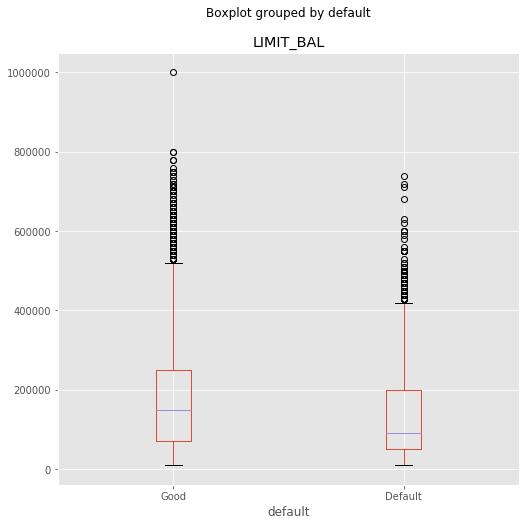

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(8,8))
df.boxplot(column='LIMIT_BAL', by='default', ax=ax)
ax.set_xticklabels(['Good', 'Default']);

In [17]:
df[df.LIMIT_BAL>400000].sort_values('LIMIT_BAL', ascending=False).head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,,,,
2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0
18007,800000,1,1,2,46,-2,-2,-2,-1,-1,-1,6229,4636,3810,6193,1957,3175,4644,3832,6219,1961,3183,27201,0
14920,800000,1,2,1,53,-1,-1,-1,0,0,-1,7639,5552,64535,40814,12590,9339,11145,64657,131,247,9366,63482,0
28716,780000,2,2,2,41,-2,-2,-2,-2,-2,-2,101957,61715,38686,21482,72628,182792,62819,39558,22204,82097,184322,25695,0
24321,780000,1,1,1,48,0,0,0,0,0,0,171459,178587,190663,195124,184872,191090,10000,15004,10000,8000,10028,7003,0


I am going to make Age categorical.

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: agecat, dtype: int64

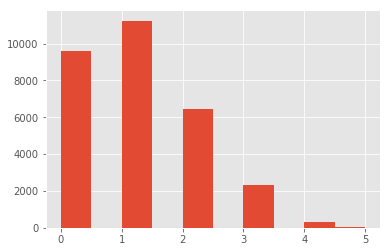

In [29]:
# df.AGE.describe()
bins = np.arange(30, 80, 10)
df['agecat'] = np.digitize(df.AGE, bins)
plt.hist(df.agecat, bins=10);
# df[['AGE', 'agecat']].head() 
df.agecat.value_counts()

In [19]:
cats = ['SEX', 'EDUCATION', 'MARRIAGE', 'agecat',
        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for cat in cats:
    df[cat] = df[cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_1        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
agecat       30000 non-null category
dtypes: cat

## Story Telling
I would like to find out what parameters impact whether a person defaults in the next month. 

First let's check out the categorical variables, including SEX, EDUCATION, MARRIAGE, PAY_1-Pay_6. I am going to make AGE categorical too. 

In [24]:
def PerStackBar_label_two(col1, df, m, figsize=(18,12), barWidth = 0.5, l=['Good','Default']):
    agedf = df.groupby(col1).count().iloc[:,0]
    pivot = pd.crosstab(df[col1], df.default)
    per = pivot.div((pivot.sum(axis=1)), axis=0)
    greenBars = per.loc[:,1]
    orangeBars = per.loc[:,0]
    v = np.hstack((greenBars, orangeBars))
    r = list(range(len(set(df[col1]))))
    
    fig,  axes= plt.subplots(2,1,figsize=figsize)
    axes[0].bar(r, agedf, color='blue',width=barWidth)
    t=0
    for i in axes[0].patches:
        axes[0].text(i.get_x()+0.2, i.get_height()+0.1, agedf.iloc[t],  fontsize=10)
        t+=1
    axes[0].set_xticks(r)
    axes[0].set_xticklabels([m[i] for i in greenBars.index])

    
    axes[1].bar(r, greenBars, color='#b5ffb9', edgecolor='white',width=barWidth, label=l[1])
    axes[1].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white',width=barWidth,label=l[0])
    t=0
    for i in axes[1].patches:
        if t<len(r):
            axes[1].text(i.get_x()+0.22, i.get_height()/2, str(round(v[t]*100,1))+'%', fontsize=12, ha='center', va='center',
                color='black')
        else:
            axes[1].text(i.get_x()+0.22, 0.8, str(round(v[t]*100,1))+'%', fontsize=10, ha='center', va='center',
                color='black')

        t+=1
    axes[1].plot([r[0]-0.35, r[-1]+0.35], [df[col2].mean(), df[col2].mean()])
    axes[1].text(r[0]-0.32, df[col2].mean()+0.02, str(round(df[col2].mean()*100,1))+'%')
    axes[1].set_xticks(r)
    axes[1].set_xticklabels([m[i] for i in greenBars.index])
    axes[1].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    axes[0].set_title(col1)
    axes[0].set_xlim([r[0]-0.35, r[-1]+0.35])
    axes[1].set_xlim([r[0]-0.35, r[-1]+0.35])
    ;

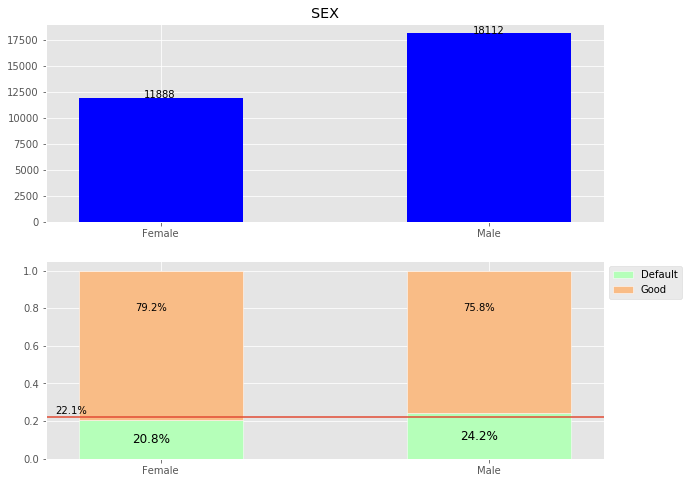

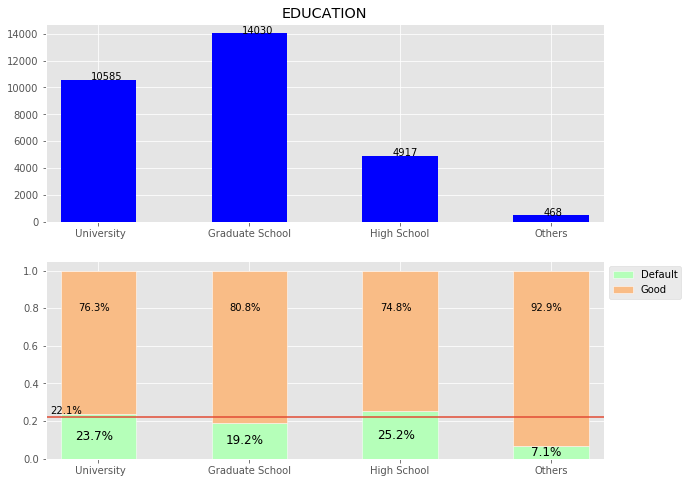

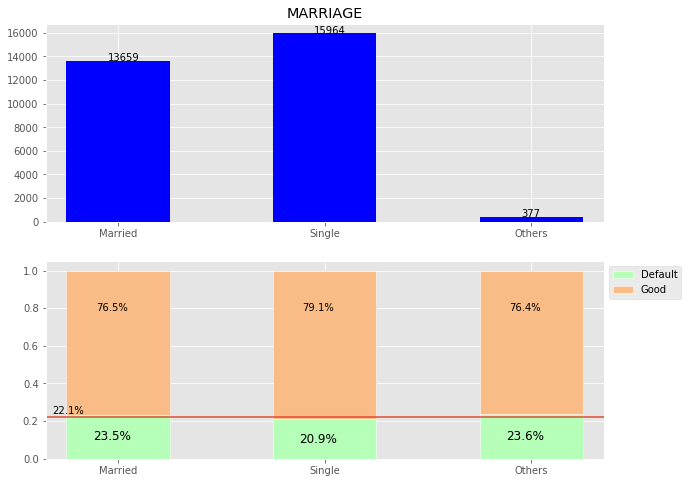

In [25]:
m1 = {1:'Male', 2:'Female'}
m2 = {1:'Graduate School', 2: ' University', 3:'High School', 4:'Others'}
m3 = {1: 'Married', 2:'Single', 3:'Others'}
mall = {1: m1, 2: m2, 3: m3}
cats = ['SEX', 'EDUCATION', 'MARRIAGE']
t = 1
for col in cats:
    PerStackBar_label_two(col, df=df, m=mall[t],figsize=(10,8))
    t += 1

In [31]:
bins = np.arange(30, 80, 10)
df['agecat'] = np.digitize(df.AGE, bins)
df.agecat.value_counts()

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: agecat, dtype: int64

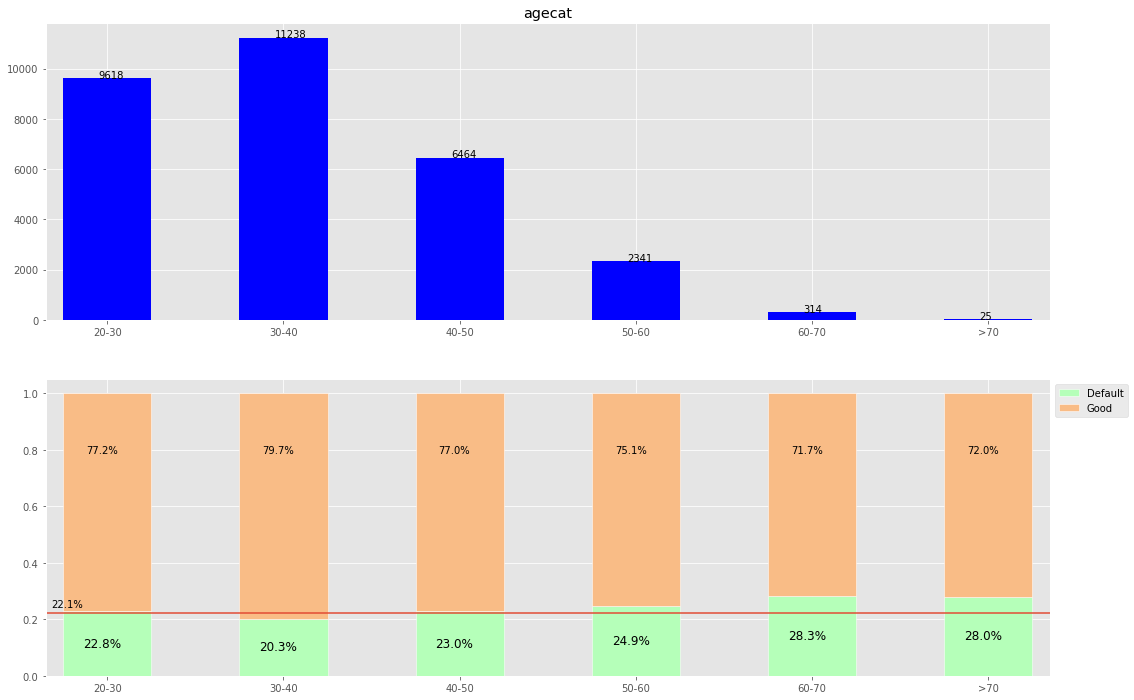

In [32]:
PerStackBar_label_two('agecat',df=df, m={0:'20-30', 1:'30-40', 2:'40-50',
                                         3:'50-60',4:'60-70', 5:'>70'}, figsize=(18,12))

It seems that we can group 60-70 with 70-80, considering the small number of records in each group and similar default rate.

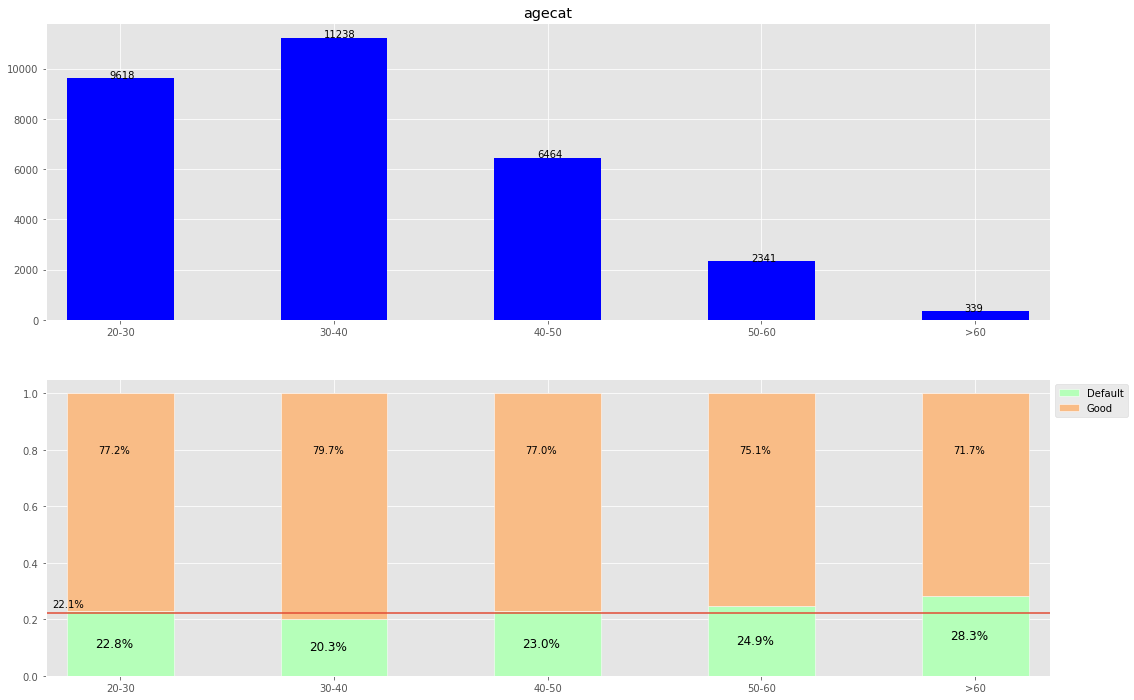

In [33]:
bins = np.arange(30, 70, 10)
df['agecat'] = np.digitize(df.AGE, bins)
PerStackBar_label_two('agecat',df=df, m={0:'20-30', 1:'30-40', 2:'40-50',
                                         3:'50-60',4:'>60'}, figsize=(18,12))

Based on the age group above, it seems like that it might make sense to divide the age into three groups, 20-30, 30 -40, and $>40$.

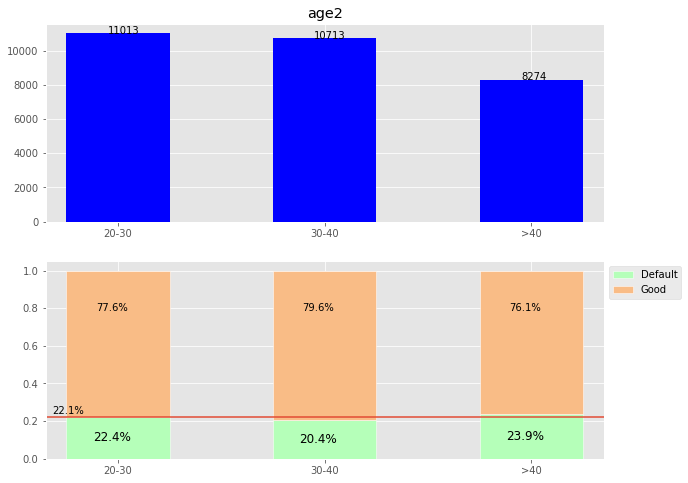

In [34]:
df['age2'] = [0 if i<=30 else (1 if i <=40 else 2) for i in df.AGE]
PerStackBar_label_two('age2',df=df, m=['20-30', '30-40', '>40'],figsize=(10,8))

# Statistical Tests

In [35]:
import scipy.stats as ss
def chi2test(col):
    chi2_stat, p_val, dof, ex = ss.chi2_contingency(np.array(pd.crosstab(df[col], df.default)))
    return print('The chi-square test shows that the p-value for independence test between '
                 + col + ' and default is ' + str(round(p_val,2)) +'. So ' + col 
                 + str([' has ' if p_val<.05 else ' does not have'][0]) + 'impact on default.')

Check the independence of each of the categorical variables with default using $\chi^2$ test.

In [36]:
cats = ['SEX', 'EDUCATION', 'MARRIAGE', 'agecat']
for cat in cats:
    chi2test(cat)

The chi-square test shows that the p-value for independence test between SEX and default is 0.0. So SEX has impact on default.
The chi-square test shows that the p-value for independence test between EDUCATION and default is 0.0. So EDUCATION has impact on default.
The chi-square test shows that the p-value for independence test between MARRIAGE and default is 0.0. So MARRIAGE has impact on default.
The chi-square test shows that the p-value for independence test between agecat and default is 0.0. So agecat has impact on default.


All of the independent categorical variables are related to default. However, some variables have more than 2 categories. I want to find out which category is significant different from the other.
- Graduate School vs. (University and High school)
- Married vs. Single
- 20-30 Age Group vs. 30-40 Age Group
- 30-40 Age Group vs. $>40$ Age Group 
        
For the two age group tests, I use Bonferroni correction, since I am doing two seperate t-tests on the same data. The new critical alpha is $1 – (1-\frac{.05}{2})^2 = 0.049$.

In [37]:
def testind(a,b):
    t2, p2 = ss.ttest_ind(a,b)
    print("t = " + str(t2))
    print("p = " + str(2*p2))

- Graduate School vs. (University and High school)

In [38]:
a = df.loc[df.EDUCATION==1, 'default']
b = df.loc[np.logical_or(df.EDUCATION==2, df.EDUCATION==3), 'default']
testind(a,b)

t = -9.645728052899484
p = 1.104415333646277e-21


- Married vs. Single

In [39]:
a = df.loc[df.MARRIAGE==1, 'default']
b = df.loc[df.MARRIAGE==2, 'default']
testind(a,b)

t = 5.261265691049691
p = 2.8812215572868566e-07


- 20-30 Age Group vs. 30-40 Age Group

Use Bonferroni correction, since I am doing two seperate t-tests on the same data. The new critical alpha is $1 – (1-\frac{.05}{2})^2 = 0.049$.

In [40]:
a = df.loc[df.AGE<=30, 'default']
b = df.loc[np.logical_and(df.AGE<=40, df.AGE>30), 'default']
testind(a,b)

t = 3.5987097020791663
p = 0.0006410215789179008


- 30-40 Age Group vs. $>40$ Age Group

Use Bonferroni correction, since I am doing two seperate t-tests on the same data. The new critical alpha is $1 – (1-\frac{.05}{2})^2 = 0.049$.

In [41]:
a = df.loc[np.logical_and(df.AGE<=40, df.AGE>30), 'default']
b = df.loc[df.AGE>40, 'default']
testind(a,b)

t = -5.699177751164759
p = 2.4434388885885e-08


# Results Part 1:
The graphs above reveal several things:
- The default rate for male (24.2%) is significantly higher (p-value < 0.01) than female (20.8%). To be specific, the default rate for male is higher than the overall rate (22.1%), while the default rate for female is smaller than the overall rate. 
- The default rate for people whose highest eduacation is university and high school is higher than the overall rate, while the default rate for graduate school are lower than the overall rate.
- The default rate for married and other people is higher than the overall rate, while the default rate for single people is lower than the overall rate.
- The default rate for the age group 30-40 is the lowest, and the default rate for 60 and above is the highest. 

All four categorical variables have significant impact on the default rate.

The overall message is 
1. Male is more likely to default than females;
2. The highest education is university or lower is more likely to default;
3. Married people is more likely to default than single people;
4. Peple younger than 30 or older than 40 is more likely to default, especially for people older than 40.

In [42]:
def PerStackBar1(col1, df, m, figsize=(16,8), barWidth = 0.5, l=['Good','Default']):
    "col2 should be the target variable, for example, whether stay or exit for churn rate"
    agedf = df.groupby(col1).count().iloc[:,0]
    pivot = pd.crosstab(df[col1], df.default)
    per = pivot.div((pivot.sum(axis=1)), axis=0)
    greenBars = per.loc[:,1]
    orangeBars = per.loc[:,0]
    v = np.hstack((greenBars, orangeBars))
    r = list(range(len(set(df[col1]))))
    
    fig,  axes= plt.subplots(2,1,figsize=figsize)
    axes[0].bar(r, agedf, color='blue',width=barWidth)
    t=0
    for i in axes[0].patches:
        axes[0].text(i.get_x()+0.2, i.get_height()+0.1, agedf.iloc[t],  fontsize=10)
        t+=1
    axes[0].set_xticks(r)
    axes[0].set_xticklabels([m[i] for i in greenBars.index])

    
    axes[1].bar(r, greenBars, color='#b5ffb9', edgecolor='white',width=barWidth, label=l[1])
    axes[1].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white',width=barWidth,label=l[0])
    t=0
    for i in axes[1].patches:
        if t<len(r):
            axes[1].text(i.get_x()+0.2, i.get_height()/2, str(round(v[t]*100,1))+'%', fontsize=12, ha='center', va='center',
            color='black')
        else:
            axes[1].text(i.get_x()+0.2, 0.9, str(round(v[t]*100,1))+'%', fontsize=12, ha='center', va='center',
            color='black')

        t+=1
    axes[1].plot([r[0]-0.35, r[-1]+0.35], [df[col2].mean(), df[col2].mean()])
    axes[1].text(r[0]-0.32, df[col2].mean()+0.02, str(round(df[col2].mean()*100,1))+'%')
    axes[1].set_xticks(r)
    axes[1].set_xticklabels([m[i] for i in greenBars.index])
    axes[1].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    axes[0].set_title(col1)
    axes[0].set_xlim([r[0]-0.35, r[-1]+0.35])
    axes[1].set_xlim([r[0]-0.35, r[-1]+0.35])
    ;

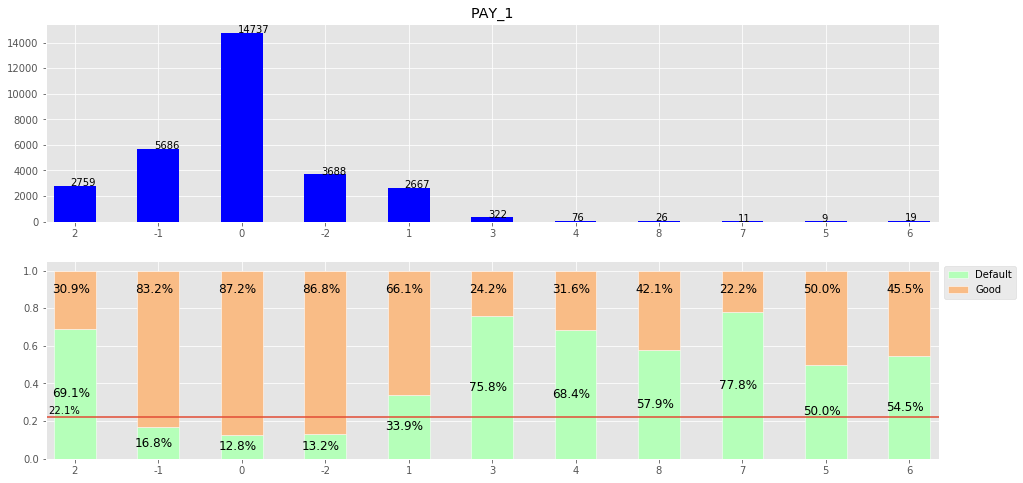

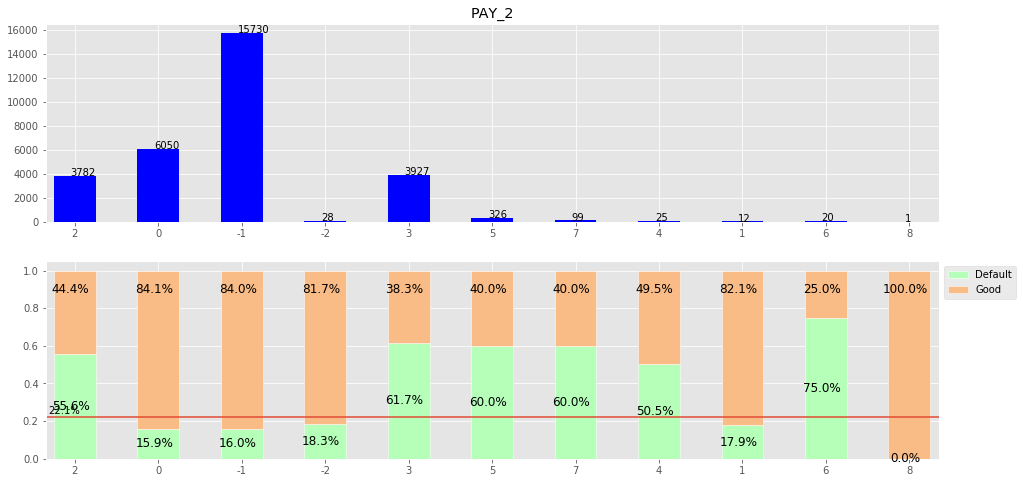

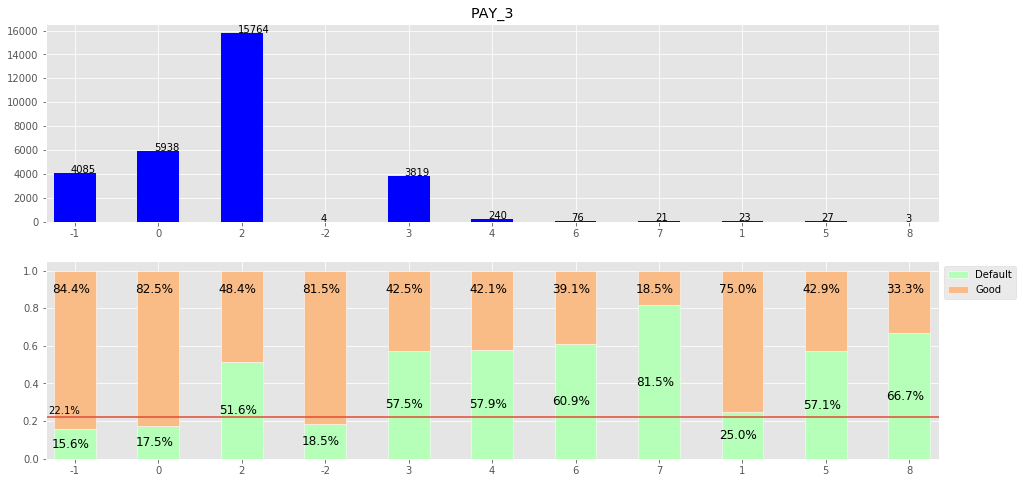

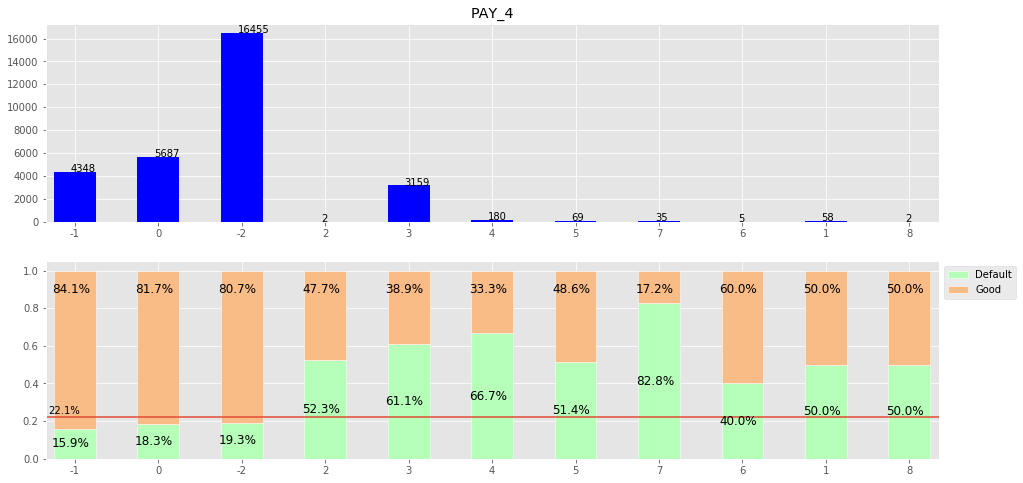

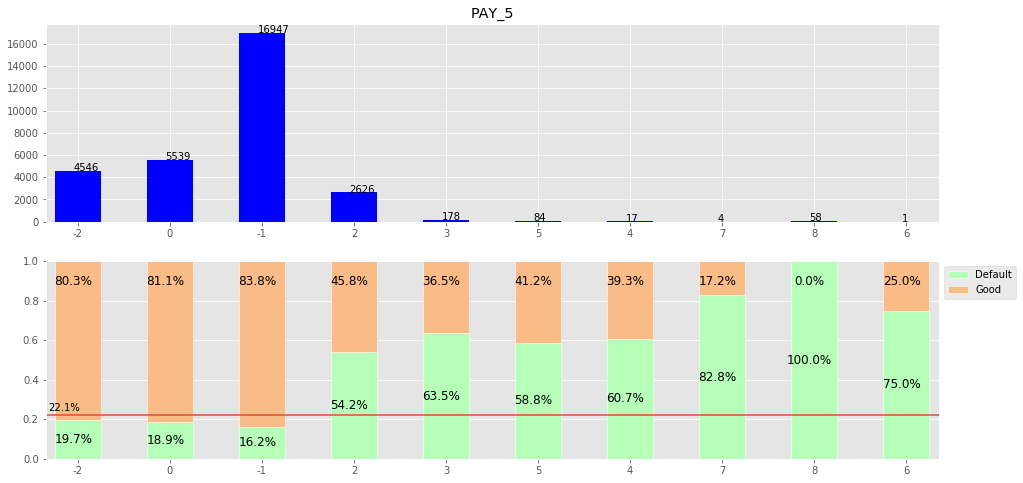

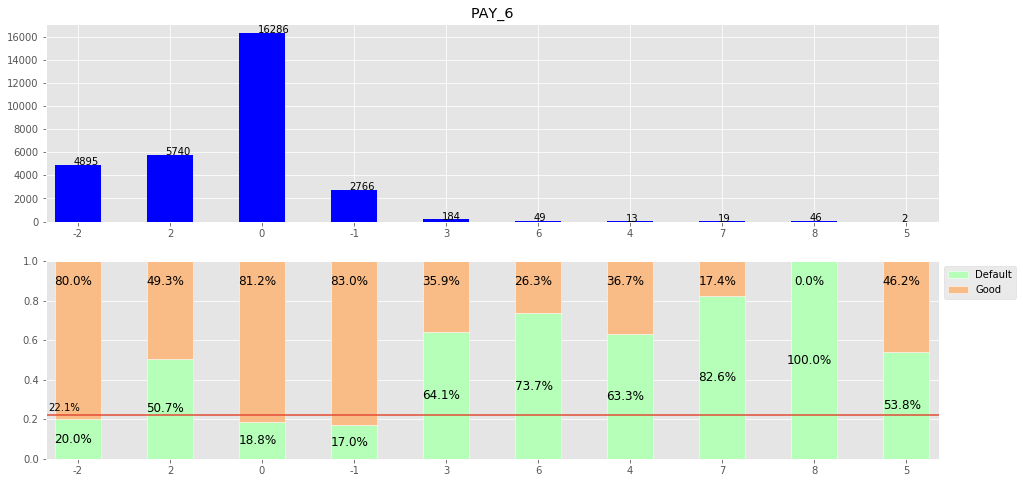

In [43]:
for col in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    PerStackBar1(col, df=df, m={i:i for i in set(df[col])})

In [44]:
df['prop1'] = df.PAY_AMT1/df.BILL_AMT1

check = df.loc[df.BILL_AMT1!=0, ['PAY_1', 'prop1','PAY_AMT1', 'BILL_AMT1', 'LIMIT_BAL']]
check.head(30)
# print(check[check.PAY_1==0].head())
print(check[check.PAY_1==-1].head(20))
# check[check.prop1==np.inf].head()

   PAY_1      prop1  PAY_AMT1  BILL_AMT1  LIMIT_BAL
ID                                                 
2     -1   0.000000         0       2682     120000
5     -1   0.232099      2000       8617      50000
12    -1   1.779463     21818      12261     260000
13    -1   0.082393      1000      12137     630000
22    -1   1.000000       316        316     120000
29    -1   5.253846      3415        650      50000
31    -1   1.037486     17270      16646     230000
36    -1   0.004328       131      30265     160000
40    -1  18.222892      9075        498     280000
49    -1   0.961564     21540      22401     380000
59    -1   0.000000         0       1587     200000
65    -1   0.000000         0         99     130000
71    -1   0.000000         0        780      80000
73    -1   0.641031      5818       9076     200000
75    -1   1.874344      5713       3048     340000
77    -1   0.041062      1759      42838      50000
78    -1   1.000000       291        291     300000
87    -1   3

Strange things:

The Pay_1 to Pay_6 are the repayment status in September, 2015 to April, 2015. The positive number is the number of months a payment is delayed. -1 means pay duly. However, It does not mention -2 and 0 in the description. I am trying to find out the answer in the data first. 

I looked at PAY_AMT1, BILL_AMT1, and PAY_1, which are the payment amount, bill amount, and payment status for September, 2015. I found several strange thing with this data. 
- For example, for ID 2, the bill amount is 2682 and the payment amount is 0, but the case is still labeled as -1, which means pay duly. The explanation I could come up with is that sometime credit card company has some promotion for certain amount of time. Even though this person has a positive bill amount, the minimum payment is 0? Otherwise, I could not make sense of this.
- I cannot tell the difference between payment status 0, -1, -2. If -1 means pay duly, what about 0 and -2? I checked the proportion of the payment amount and the bill amount, I cannot tell if there is a threshold they use here. 
- Even though the bill amount is negative amount, people still pay the credit card. Some are labeled as -1, some are labled as -2 and some are labeled as 0. This does not make any sense.

This occurs to me that it may be possible that PAY_AMT1 is for BILL_AMT2, rather than BILL_AMT1. This means that the amount one pays in Sepetember, 2015 is for the bill issued in August, 2015.

In [45]:
dforg = df

In [46]:
df['prop1'] = (df.PAY_AMT1/df.BILL_AMT2).fillna(1)

check = df[['PAY_1', 'prop1','PAY_AMT1', 'BILL_AMT2', 'LIMIT_BAL','BILL_AMT1','default']]
check.head(30)
print(check[check.PAY_1==-2].head(20))
# print(check[np.logical_and(check.PAY_1==-2, check.prop1<1)].head(20))

    PAY_1     prop1  PAY_AMT1  BILL_AMT2  LIMIT_BAL  BILL_AMT1  default
ID                                                                     
10     -2  1.000000         0          0      20000          0        0
24     -2  1.000412     19428      19420     450000       5512        1
34     -2  1.000000      4152       4152     500000      10929        0
35     -2  1.000000      5006       5006     500000      13709        0
46     -2  1.000000         0          0     210000          0        1
53     -2  1.001017      7875       7867     310000      13465        0
56     -2  1.000000      3640       3640     500000       1905        0
66     -2  0.000000         0     148751     200000     152519        1
93     -2  1.360036      7555       5555     100000      -2000        0
101    -2  1.000000     10212      10212     140000        672        0
102    -2 -0.735974       223       -303     380000        -81        0
144    -2  1.000000     10000      10000     170000      12159  

It seems like the amount paid in September, 2015 is for the bill in August, 2015. But I still could not make sense of the repayment status. 

I am curious to see how the repayment status changes over time.

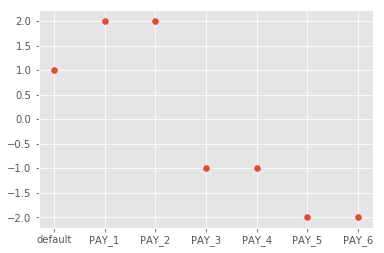

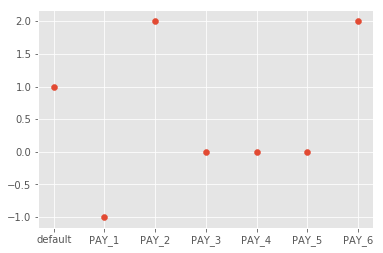

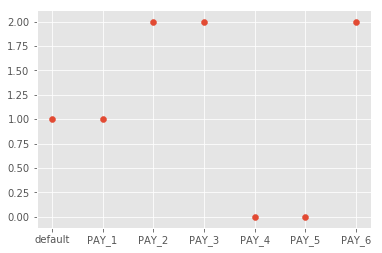

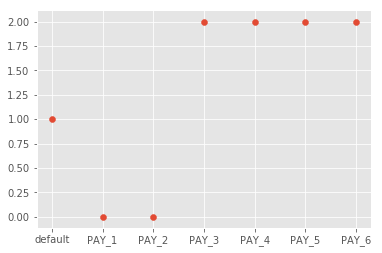

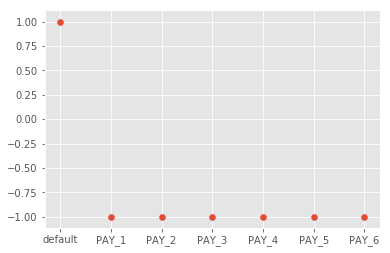

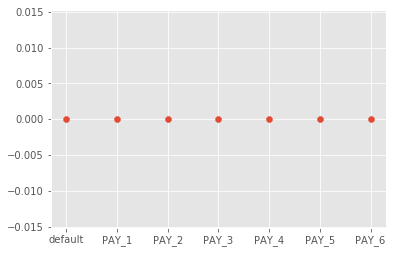

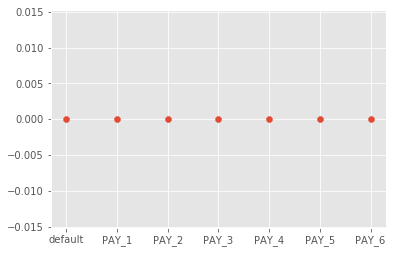

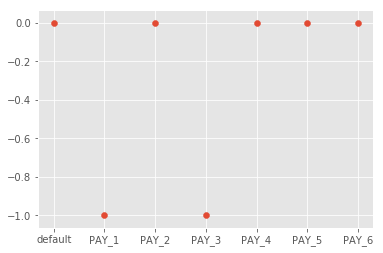

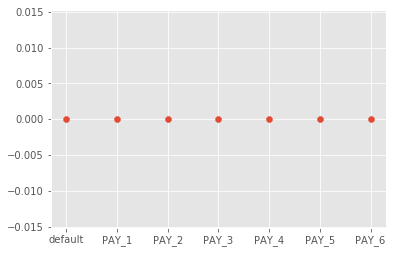

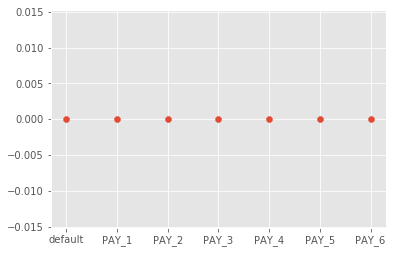

In [47]:
repay = df[['default','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
ind = [10,9, 8, 7, 6, 5, 4]
for i in range(5):
    temp = pd.DataFrame({'index':ind, 'pay':repay[repay.default==1].iloc[i]})
    plt.scatter(temp.index, temp.pay)
    plt.show()
for i in range(5):
    temp = pd.DataFrame({'index':ind, 'pay':repay[repay.default==0].iloc[i]})
    plt.scatter(temp.index, temp.pay)
    plt.show()

In [48]:
pre = [0 if sum(row[1:]<=0)==6 else 1 for ind, row in repay.iterrows()]
pd.crosstab(pd.Series(pre), repay.default)

default,0,1
row_0,,
0,15597,4334
1,7767,2301


I have plotted five records who eventually defaulted and five records who did not default the next month. I plot the repayment status over time. It does not seem to have any obvious patterns. But I did find one pattern, that is, if a person paid the bill in all previous six months, he is more likely to pay the next month bill (about 2/3). 

I am curious to check one more thing. That is, if the person has negative bill amount, what his payment status will be?

In [49]:
check = df[['PAY_1','PAY_AMT1', 'BILL_AMT2', 'LIMIT_BAL','BILL_AMT1','default']]
check[check.BILL_AMT2<0].head(10)

,PAY_1,PAY_AMT1,BILL_AMT2,LIMIT_BAL,BILL_AMT1,default
ID,,,,,,
27,1,0,-425,60000,-109,1
36,-1,131,-131,160000,30265,0
69,1,0,-9850,130000,-190,0
102,-2,223,-303,380000,-81,0
110,1,0,-103,360000,-103,0
150,1,0,-1100,260000,-1100,0
174,1,0,-709,50000,-709,1
217,1,0,-946,240000,-946,1
320,1,0,-2,180000,-2,0


Looking at the results above, I am very puzzeled. As we can see from the table above, when a person has negative balance, sometimes it was labled as paid, sometime it was labeled default. How possible if a person has negative balance and be labled as default in the payment? I suspect this is a bug when they convert the data. I would like to fix the data for this part. I would talk to the person who created the data set first before I made any changes. But I do not that access now. I will change these part and assume now that they are doing the rest correct. 

In [50]:
# make sure the payment status is -1 if the balance for that month is negative
df['default'] = [i if j>0 else 0 for i, j in zip(df.default, df.BILL_AMT1) ]
df['PAY_1'] = [i if j>0 else -1 for i, j in zip(df.PAY_1, df.BILL_AMT2) ]
df['PAY_2'] = [i if j>0 else -1 for i, j in zip(df.PAY_2, df.BILL_AMT3) ]  
df['PAY_3'] = [i if j>0 else -1 for i, j in zip(df.PAY_3, df.BILL_AMT4) ]  
df['PAY_4'] = [i if j>0 else -1 for i, j in zip(df.PAY_4, df.BILL_AMT5) ]  
df['PAY_5'] = [i if j>0 else -1 for i, j in zip(df.PAY_5, df.BILL_AMT6) ]
df['PAY_5'] = [i if j>0 else -1 for i, j in zip(df.PAY_5, df.BILL_AMT6) ]  

In [51]:
check = df[['PAY_1','PAY_AMT1', 'BILL_AMT2', 'LIMIT_BAL','BILL_AMT1','default']]
check[check.BILL_AMT2<0].head(10)
# check.head()

,PAY_1,PAY_AMT1,BILL_AMT2,LIMIT_BAL,BILL_AMT1,default
ID,,,,,,
27,-1,0,-425,60000,-109,0
36,-1,131,-131,160000,30265,0
69,-1,0,-9850,130000,-190,0
102,-1,223,-303,380000,-81,0
110,-1,0,-103,360000,-103,0
150,-1,0,-1100,260000,-1100,0
174,-1,0,-709,50000,-709,0
217,-1,0,-946,240000,-946,0
320,-1,0,-2,180000,-2,0


# Continuous Variable
Now I want to see how these continuous variables are related to each other and how they impact whether a person defaults in the next month.

In [54]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

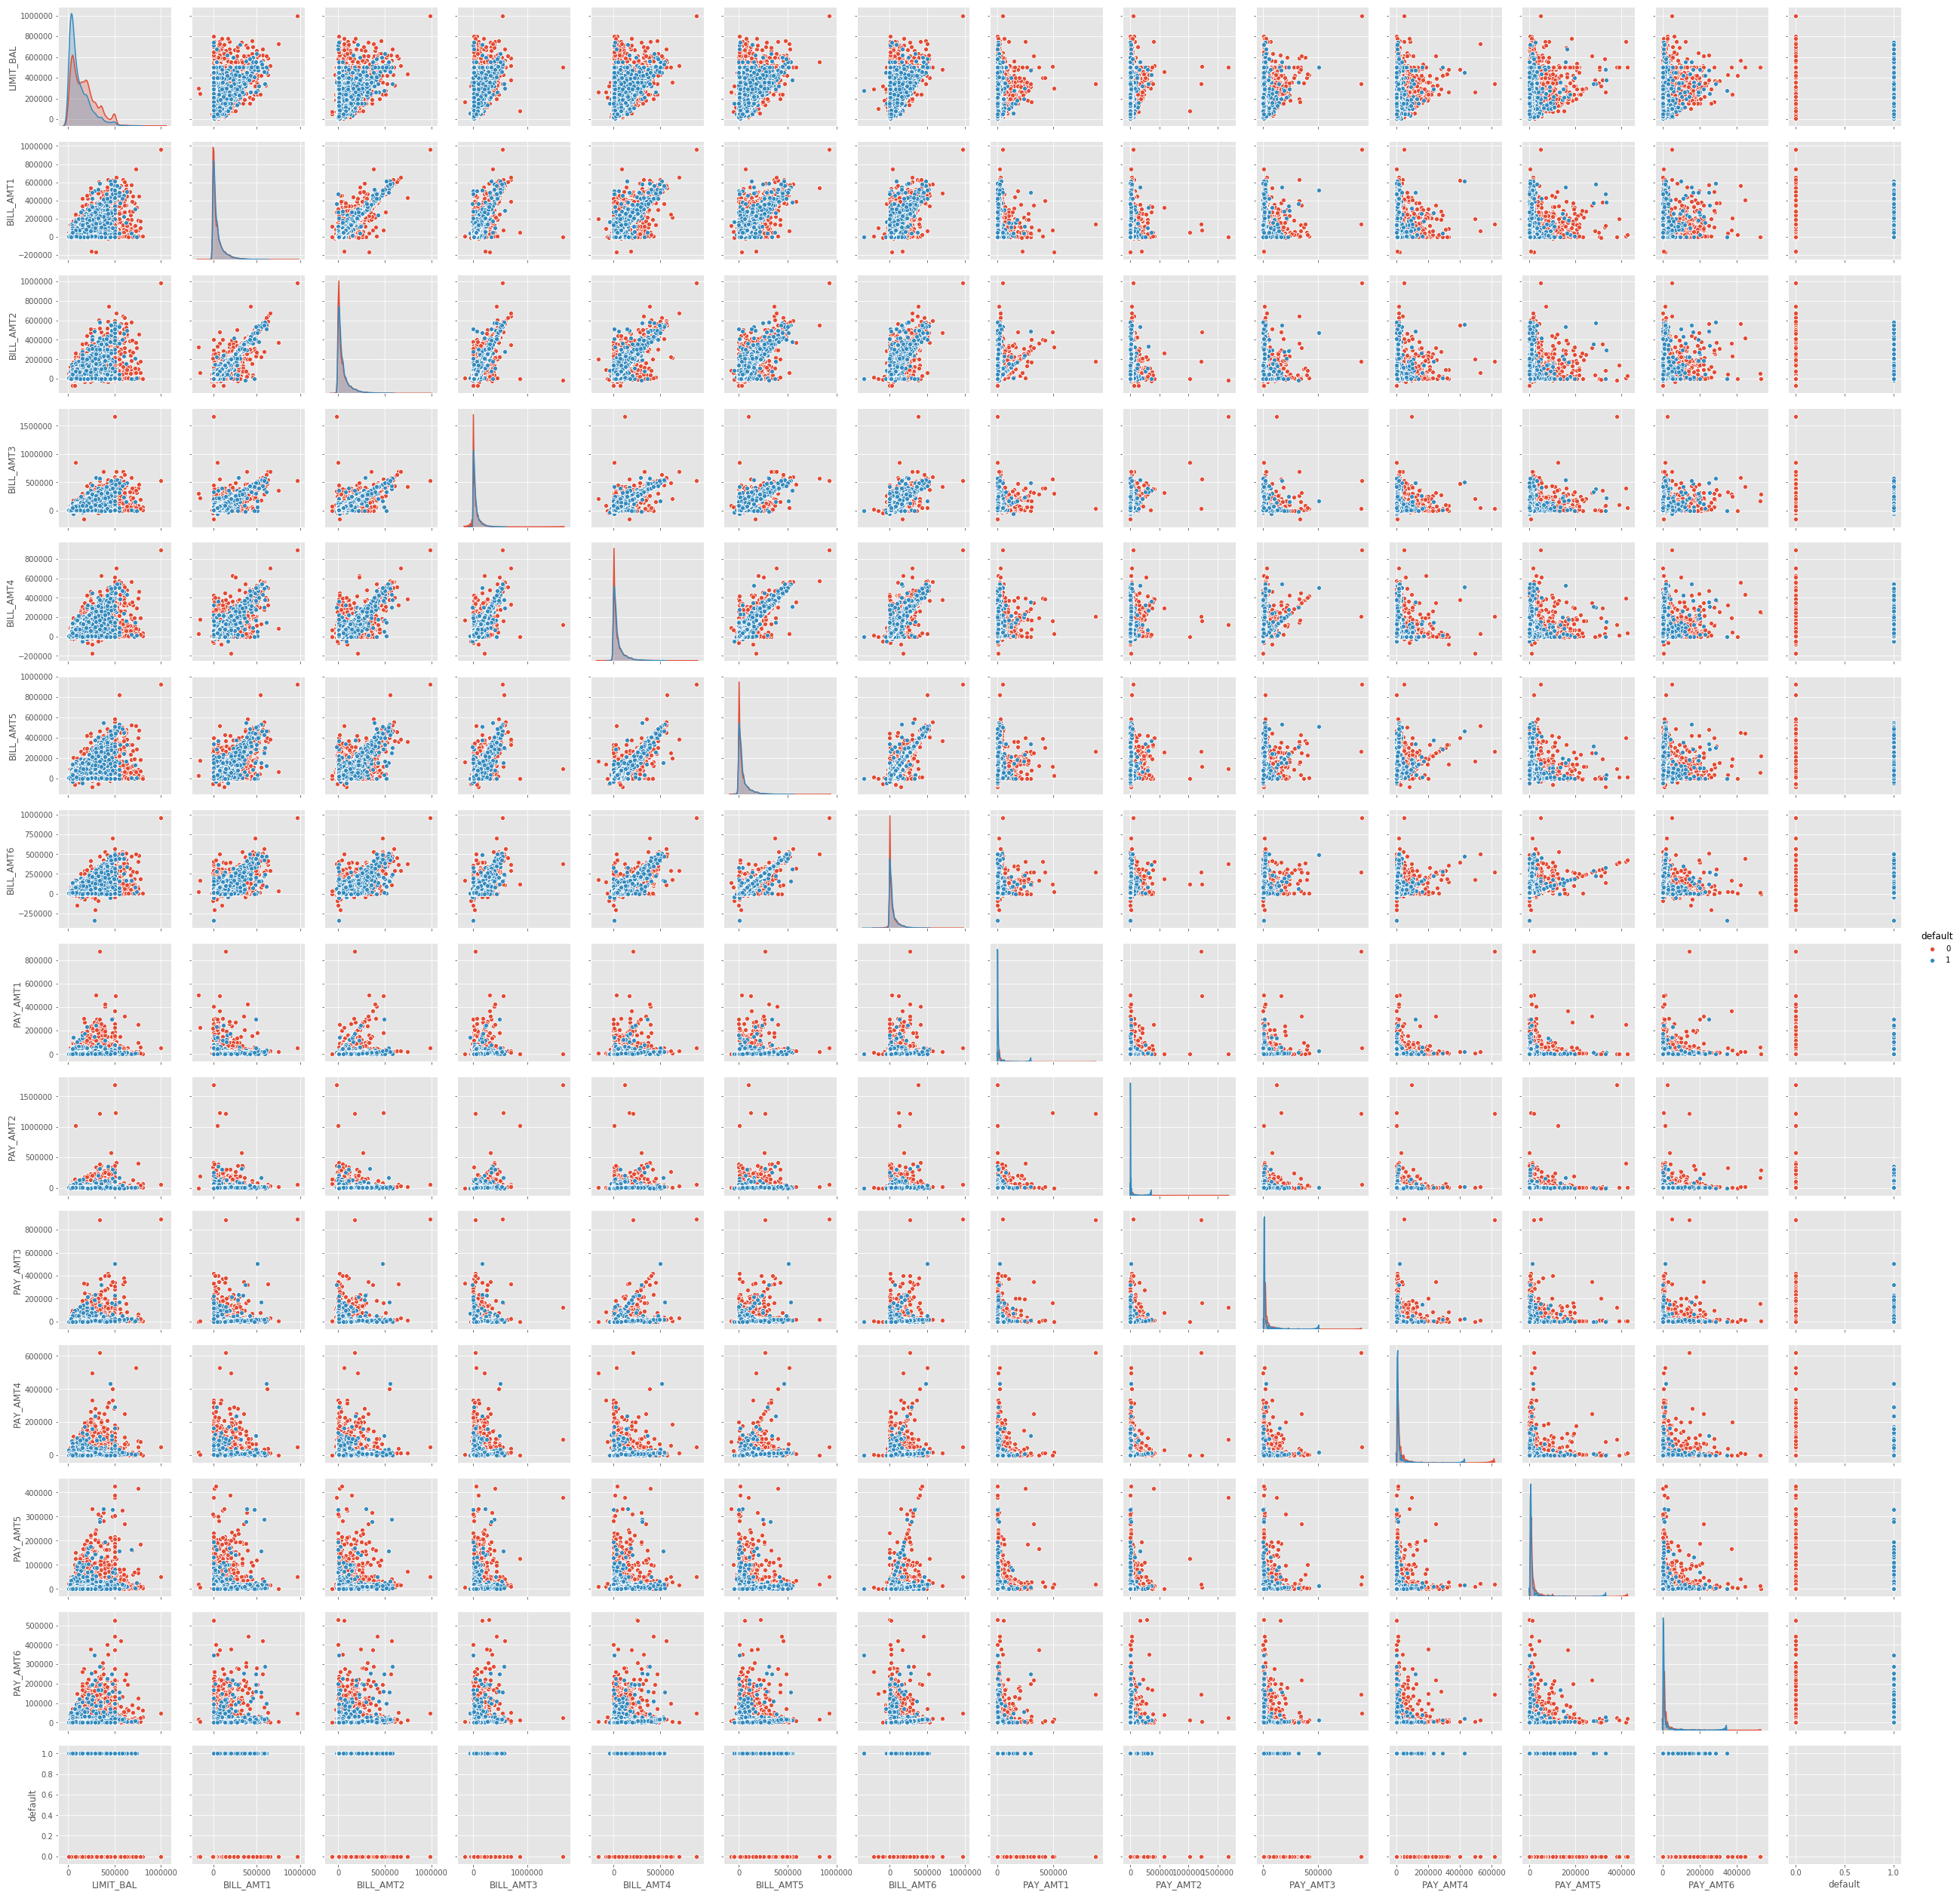

In [55]:
cons = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']
# cons = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_1',
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default']
sns.pairplot(df[cons], hue='default');

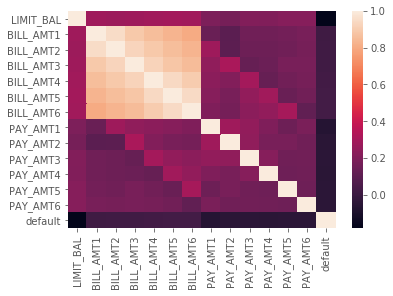

In [56]:
sns.heatmap(df[cons].corr());

Looking at the correlation matrix above, we can tell that The BILL amount is highly correlated in each month. This make sense as each person might have similar consumption habit. 

Now I want to see the proportion of bill amount with respect to the balance limit. 

In [57]:
df['balprop1'] = df.BILL_AMT1/df.LIMIT_BAL
# df.groupby('default').balprop1.plot(kind='kde') 
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=['good','default'])
# plt.xlabel('x1')

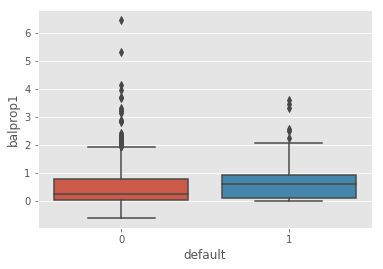

In [58]:
sns.boxplot(x='default', y='balprop1', data=df);

In [59]:
df.loc[df.balprop1>1,['LIMIT_BAL', 'default', 'BILL_AMT1', 'PAY_1','PAY_AMT1','BILL_AMT2',
                      'PAY_2', 'PAY_AMT2', 'BILL_AMT3', 'balprop1']].head(10)

,LIMIT_BAL,default,BILL_AMT1,PAY_1,PAY_AMT1,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT3,balprop1
ID,,,,,,,,,,
6,50000,0,64400,0,2500,57069,0,1815,57608,1.288000
16,50000,0,50614,1,0,29173,2,1500,28116,1.012280
60,400000,0,400134,0,17000,398857,0,15029,404205,1.000335
62,70000,0,70800,0,4025,72060,0,2095,69938,1.011429
109,130000,0,171438,0,10908,178382,0,0,39940,1.318754
130,60000,0,60521,3,2504,61450,2,7,57244,1.008683
140,50000,0,50801,0,2360,50143,0,1700,49586,1.016020
168,100000,0,102349,-1,3166,96847,2,0,58824,1.023490
190,20000,0,21703,1,0,21087,5,1000,21461,1.085150


The boxplot and table above show that there are people who use more than their credit card balance. This makes me think that maybe the person who created this data has a standard for each person about determining whether they paid their due or not. Maybe someone just needs to pay the minimum balance to be considered paid duly. Maybe someone needs to pay the whole balance to be considered paid duly. Maybe someone does not need to pay anything to be considered paid duly (even thought this is so STRANGE).

I am going to do two things now. 
- One is to label whether a person use more than their balance in last month.
- I am going to create bins for the proportion of use the credit card balance on September 2015. I want to check if this proportion is related to the next month default.

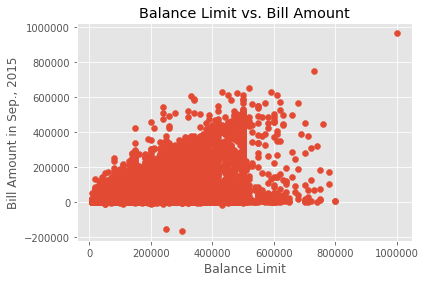

In [60]:
plt.scatter(df.LIMIT_BAL, df.BILL_AMT1)
plt.xlabel('Balance Limit')
plt.ylabel('Bill Amount in Sep., 2015')
plt.title('Balance Limit vs. Bill Amount');

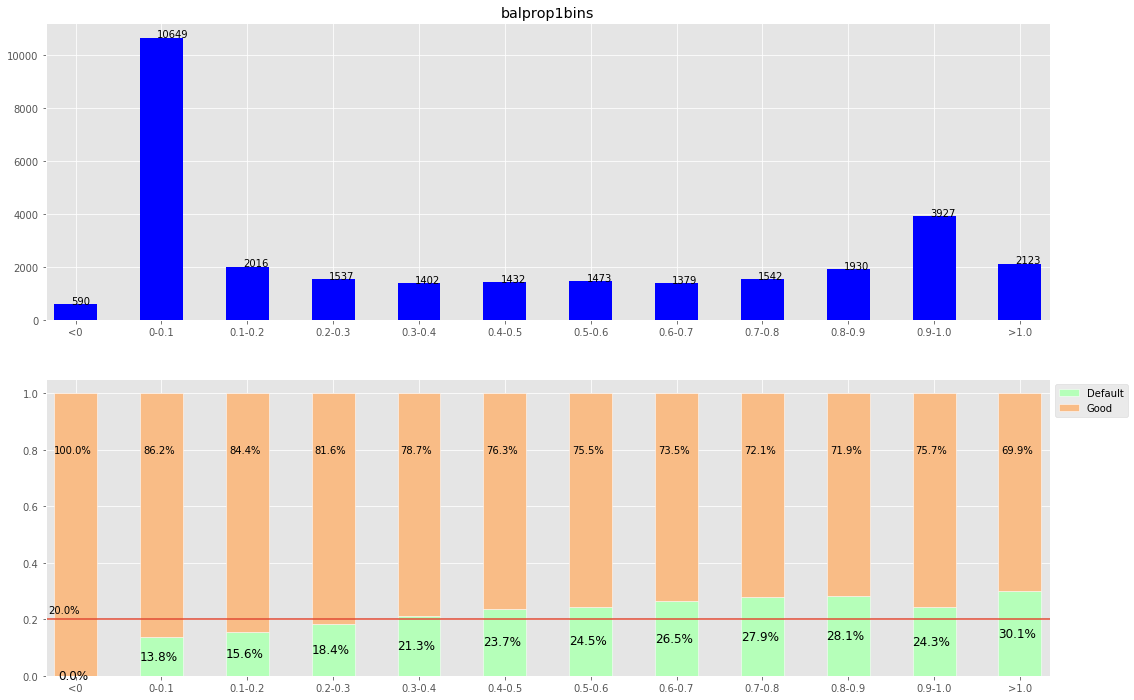

In [61]:
# bins = [0, np.linspace(0,1,.2) 1]
bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
df['balprop1bins'] = np.digitize(df.balprop1,bins)
df.balprop1bins.value_counts()
# m = {0:'<0', 1:'0-0.2', 2:'0.2-0.4', 3:'0.4-0.6', 4:'0.6-0.8', 5:'0.8-1', 6:'>1'}
m = {0:'<0', 1:'0-0.1', 2:'0.1-0.2', 3:'0.2-0.3', 4:'0.3-0.4', 
     5:'0.4-0.5',6:'0.5-0.6', 7:'0.6-0.7', 8:'0.7-0.8',
     9:'0.8-0.9', 10:'0.9-1.0',11:'>1.0'}

PerStackBar_label_two('balprop1bins', m=m, df=df)

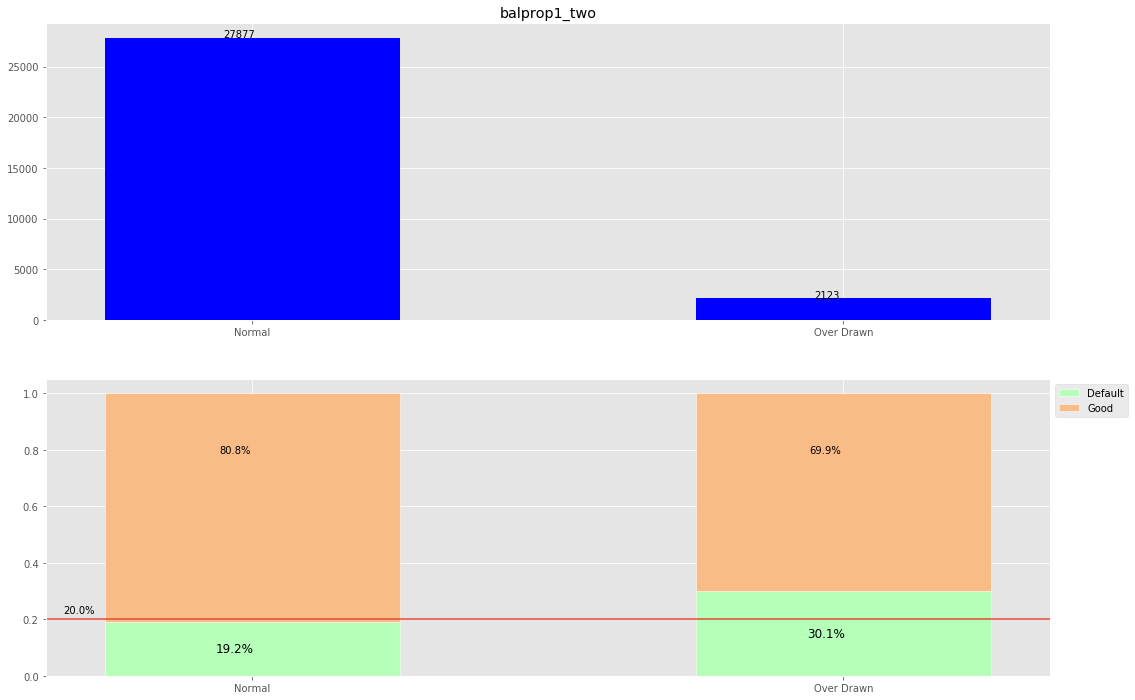

In [62]:
bins = [1]
df['balprop1_two'] = np.digitize(df.balprop1,bins)
df.balprop1bins.value_counts()
m = {0:'Normal', 1:'Over Drawn'}
PerStackBar_label_two('balprop1_two', m=m, df=df)

In [63]:
a = df.loc[df.balprop1_two == 0, 'default']
b = df.loc[df.balprop1_two == 1, 'default']
testind(a,b)

t = -12.0734755592071
p = 3.488346688303559e-33


# How much have you used?
The plots and analysis above show that whether a person overdraws has significant impact on whether a person defaults on the next month. What is more, people who use less than 10% of their limit has the lowest default rate, and people who overdraws has the highet default rate. In sum, when a person uses more than 30% of their limit, they are more likely to default. 

Thus, I keep the index of whether a person overdraws in the final model.

In [64]:
paystat = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default']]

In [65]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [66]:
pay_x = paystat.drop('default', axis=1)
pay_y = paystat.default

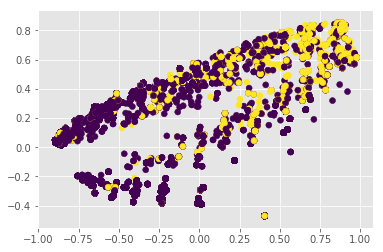

In [67]:
pay_xtran = normalize(pd.get_dummies(pay_x))
pca = PCA(n_components = 2)
Xproj = pca.fit_transform(pay_xtran)
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=pay_y);

It looks like the I could not get a good clustering with the six repayment status using PCA. More parameters should be included in the model.

# Summary:
I look at various variables in the dataset and try to find which variable significantly impact whether a person defaults in the next month. I use visualization and statistical tests. The following is a summary of the findings.
1. Male is more likely to default than females;
2. The highest education is university or lower is more likely to default;
3. Married people is more likely to default than single people;
4. People younger than 30 or older than 40 is more likely to default, especially for people older than 40.
5. People who overdraws their balance is more likely to default.
6. When a person uses less than 30% of their limit, they are less likely to default. 

There are some strange things about this dataset, including undocumented categories. How they label repayment status remains a puzzle. It seems like there are some obvious errors in terms labeling the repayment status. Future investigation should be made about how they label repayment status. What is more, more information could be collected, including the income level, the location, and more.